In [105]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [107]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [108]:
# target column is the price.
df['price'] = df['medv']
df.drop('medv',inplace=True,axis=1)

In [109]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [111]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

<IPython.core.display.Javascript object>

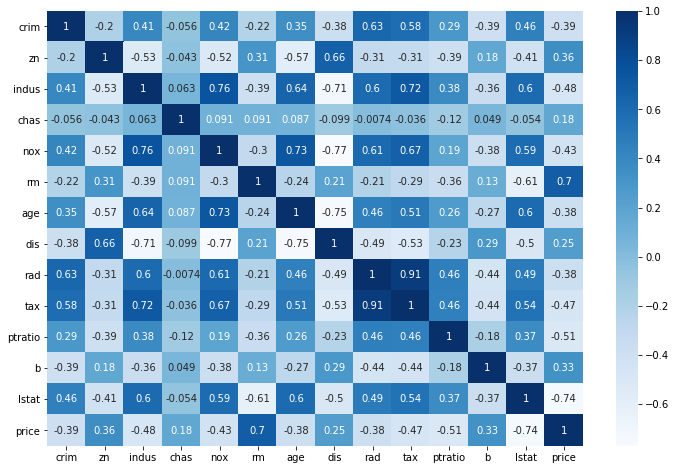

In [112]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

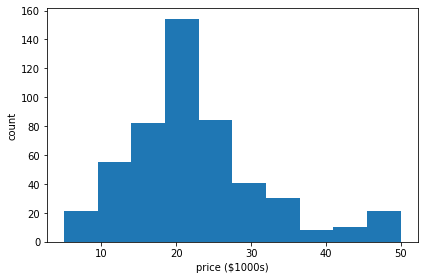

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(df.price)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

<IPython.core.display.Javascript object>

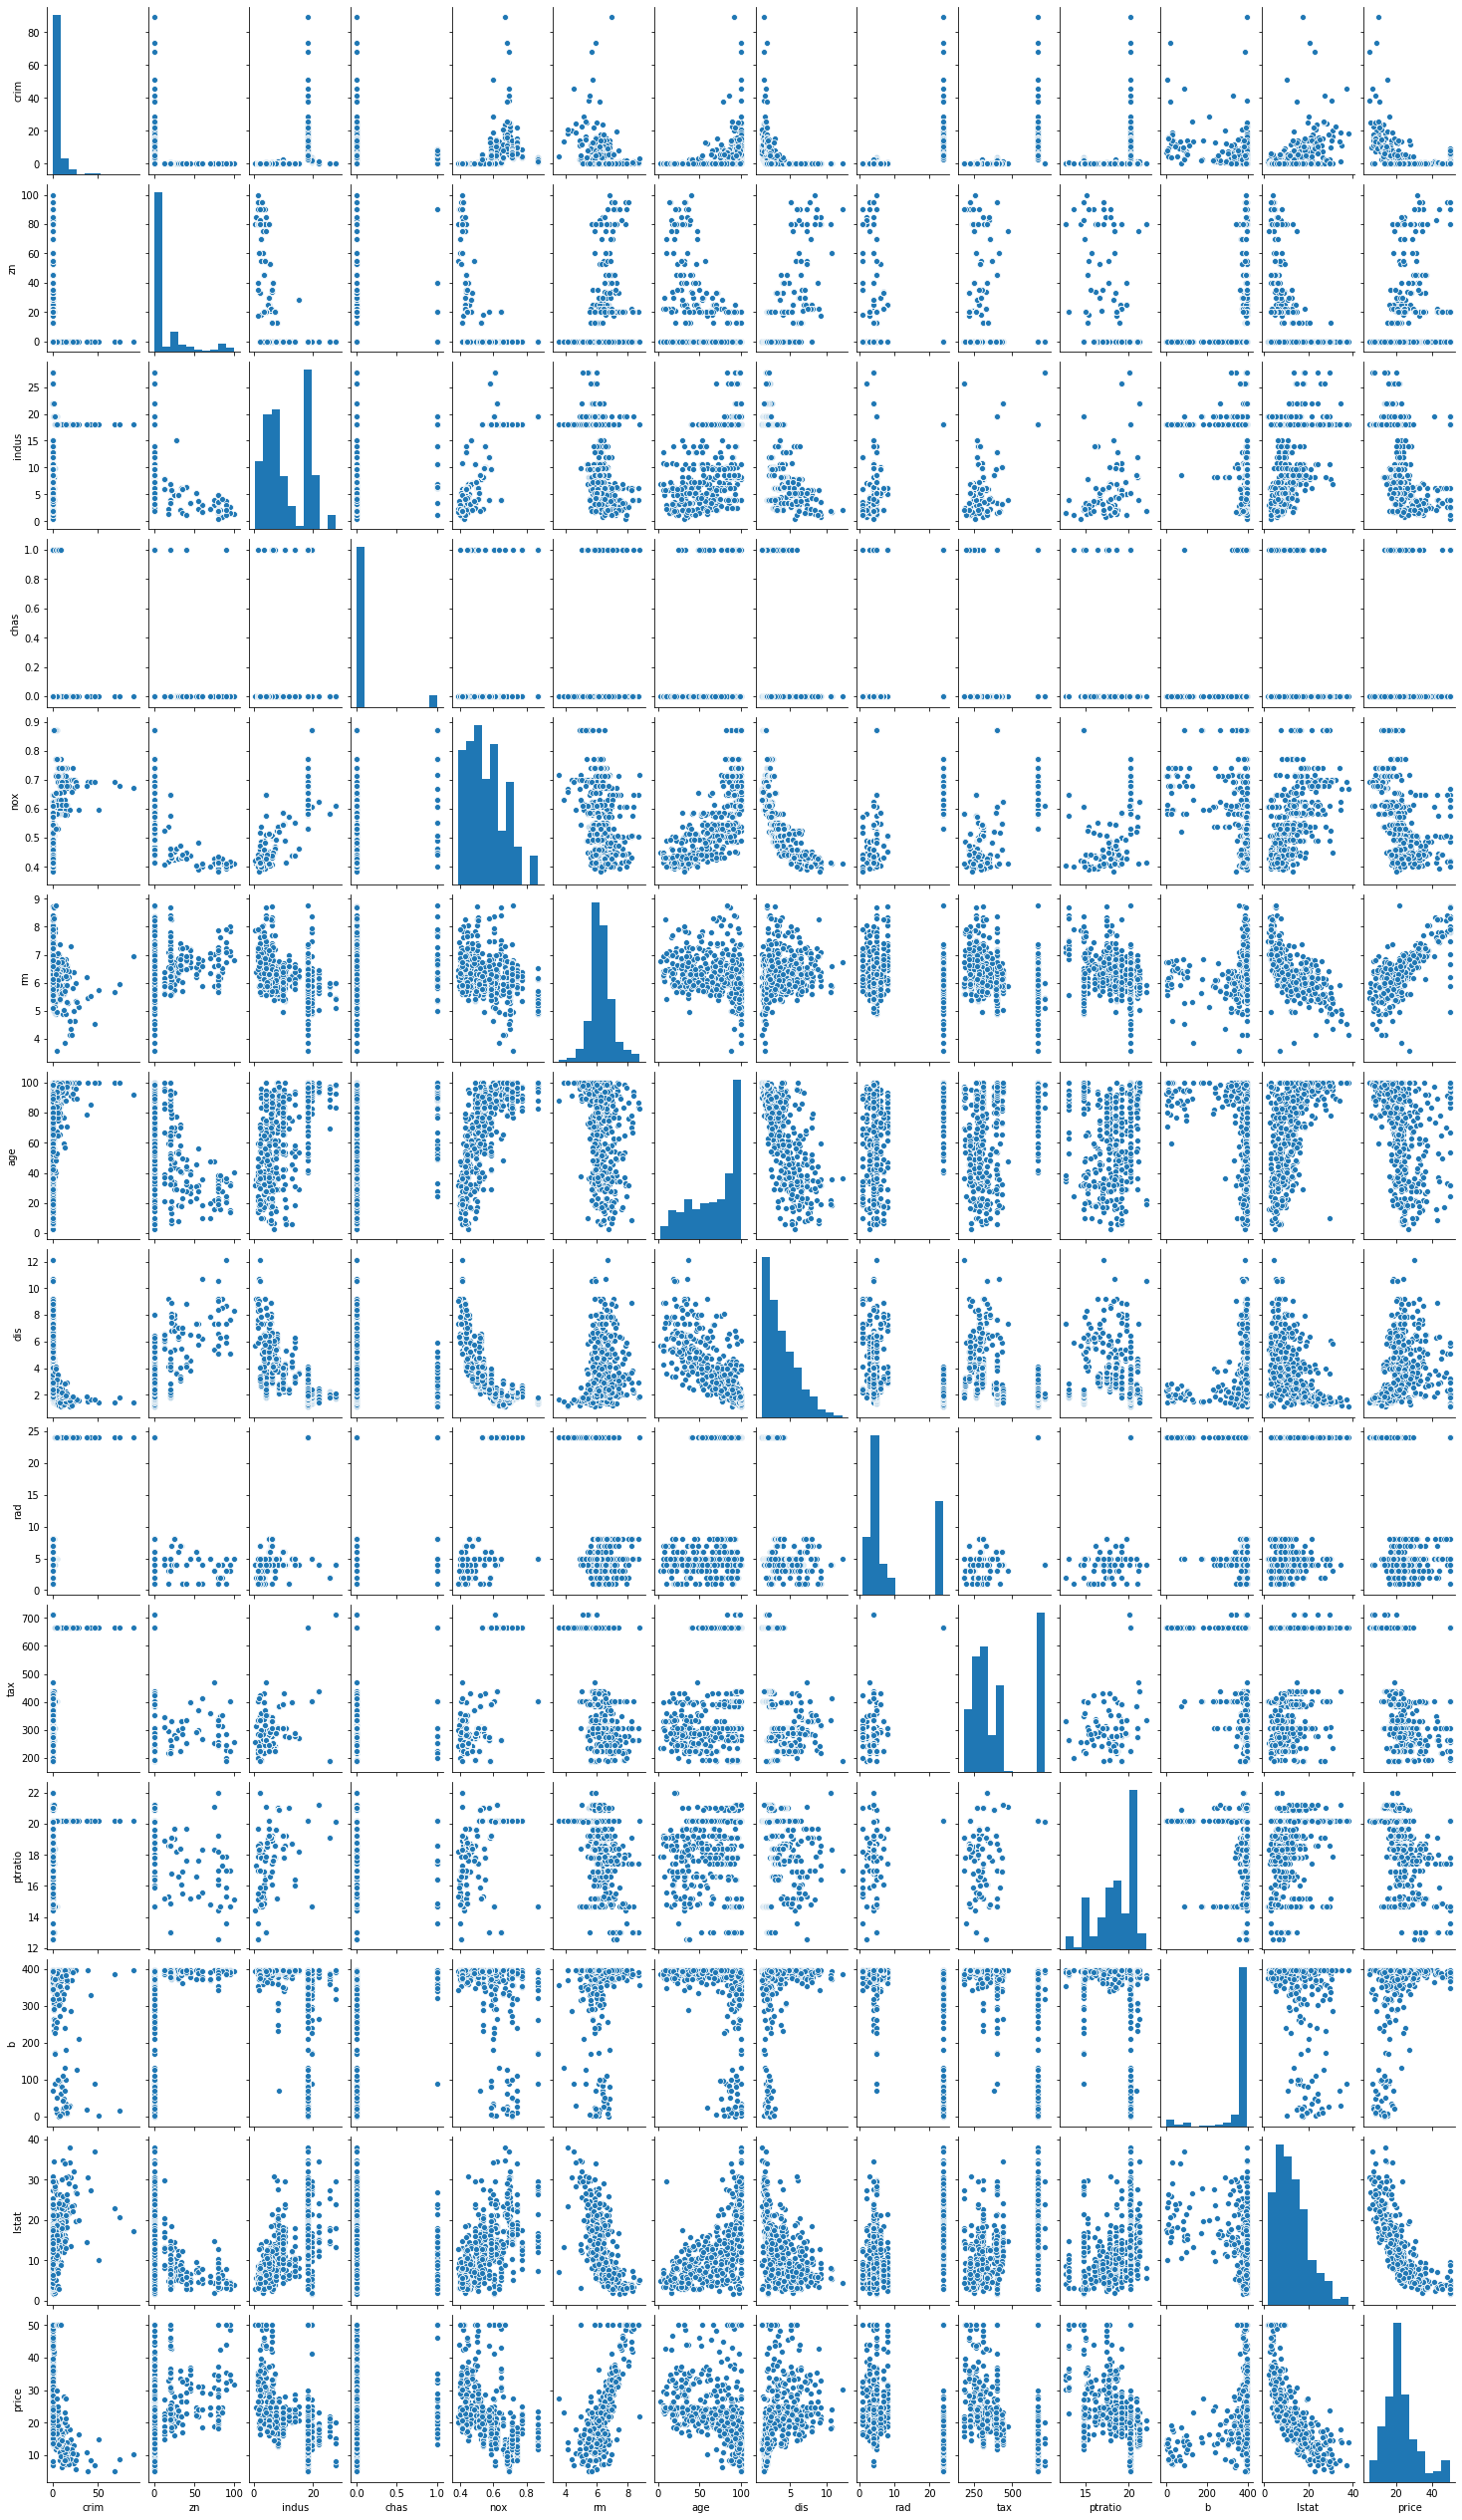

In [72]:
plot=sns.pairplot(df[:-1])
plot.fig.set_size_inches(20,35)

In [73]:
## some of the features follows a linear relationship

Inorder to check for outliers. We are plotting BOX plot for visualization.

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

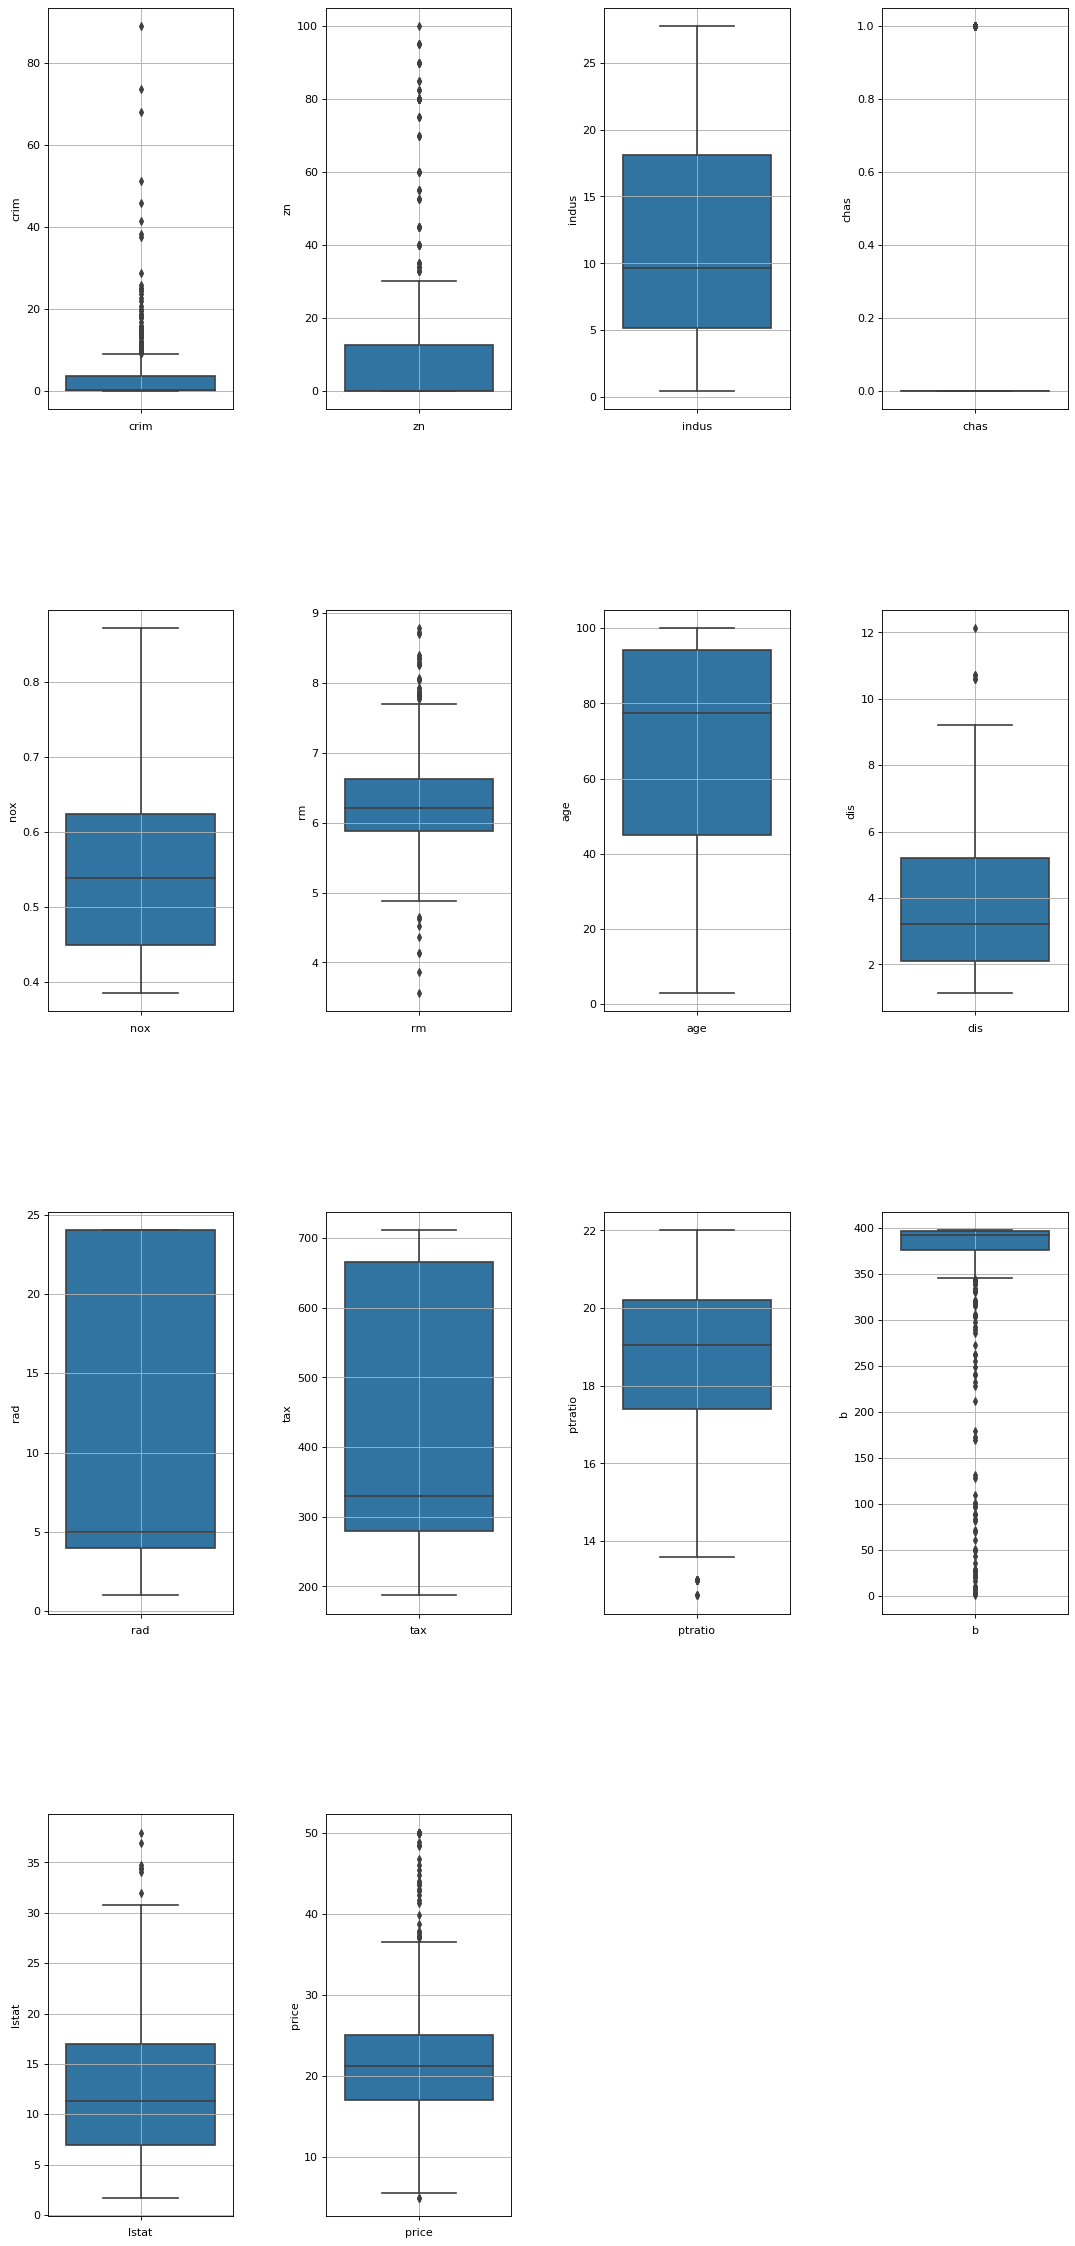

In [74]:
print(df.columns)
plt.figure(num=None, figsize=(15,30), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
var=1
for index,feature in enumerate(list(df.columns)):
    plt.subplot(4,4,index+1,xlabel=feature)
    sns.boxplot(y=df[feature])
    plt.grid()
    plt.subplots_adjust(top=0.92, bottom=0, left=0.10, right=0.95, hspace=0.5,wspace=0.5)
    var+=1

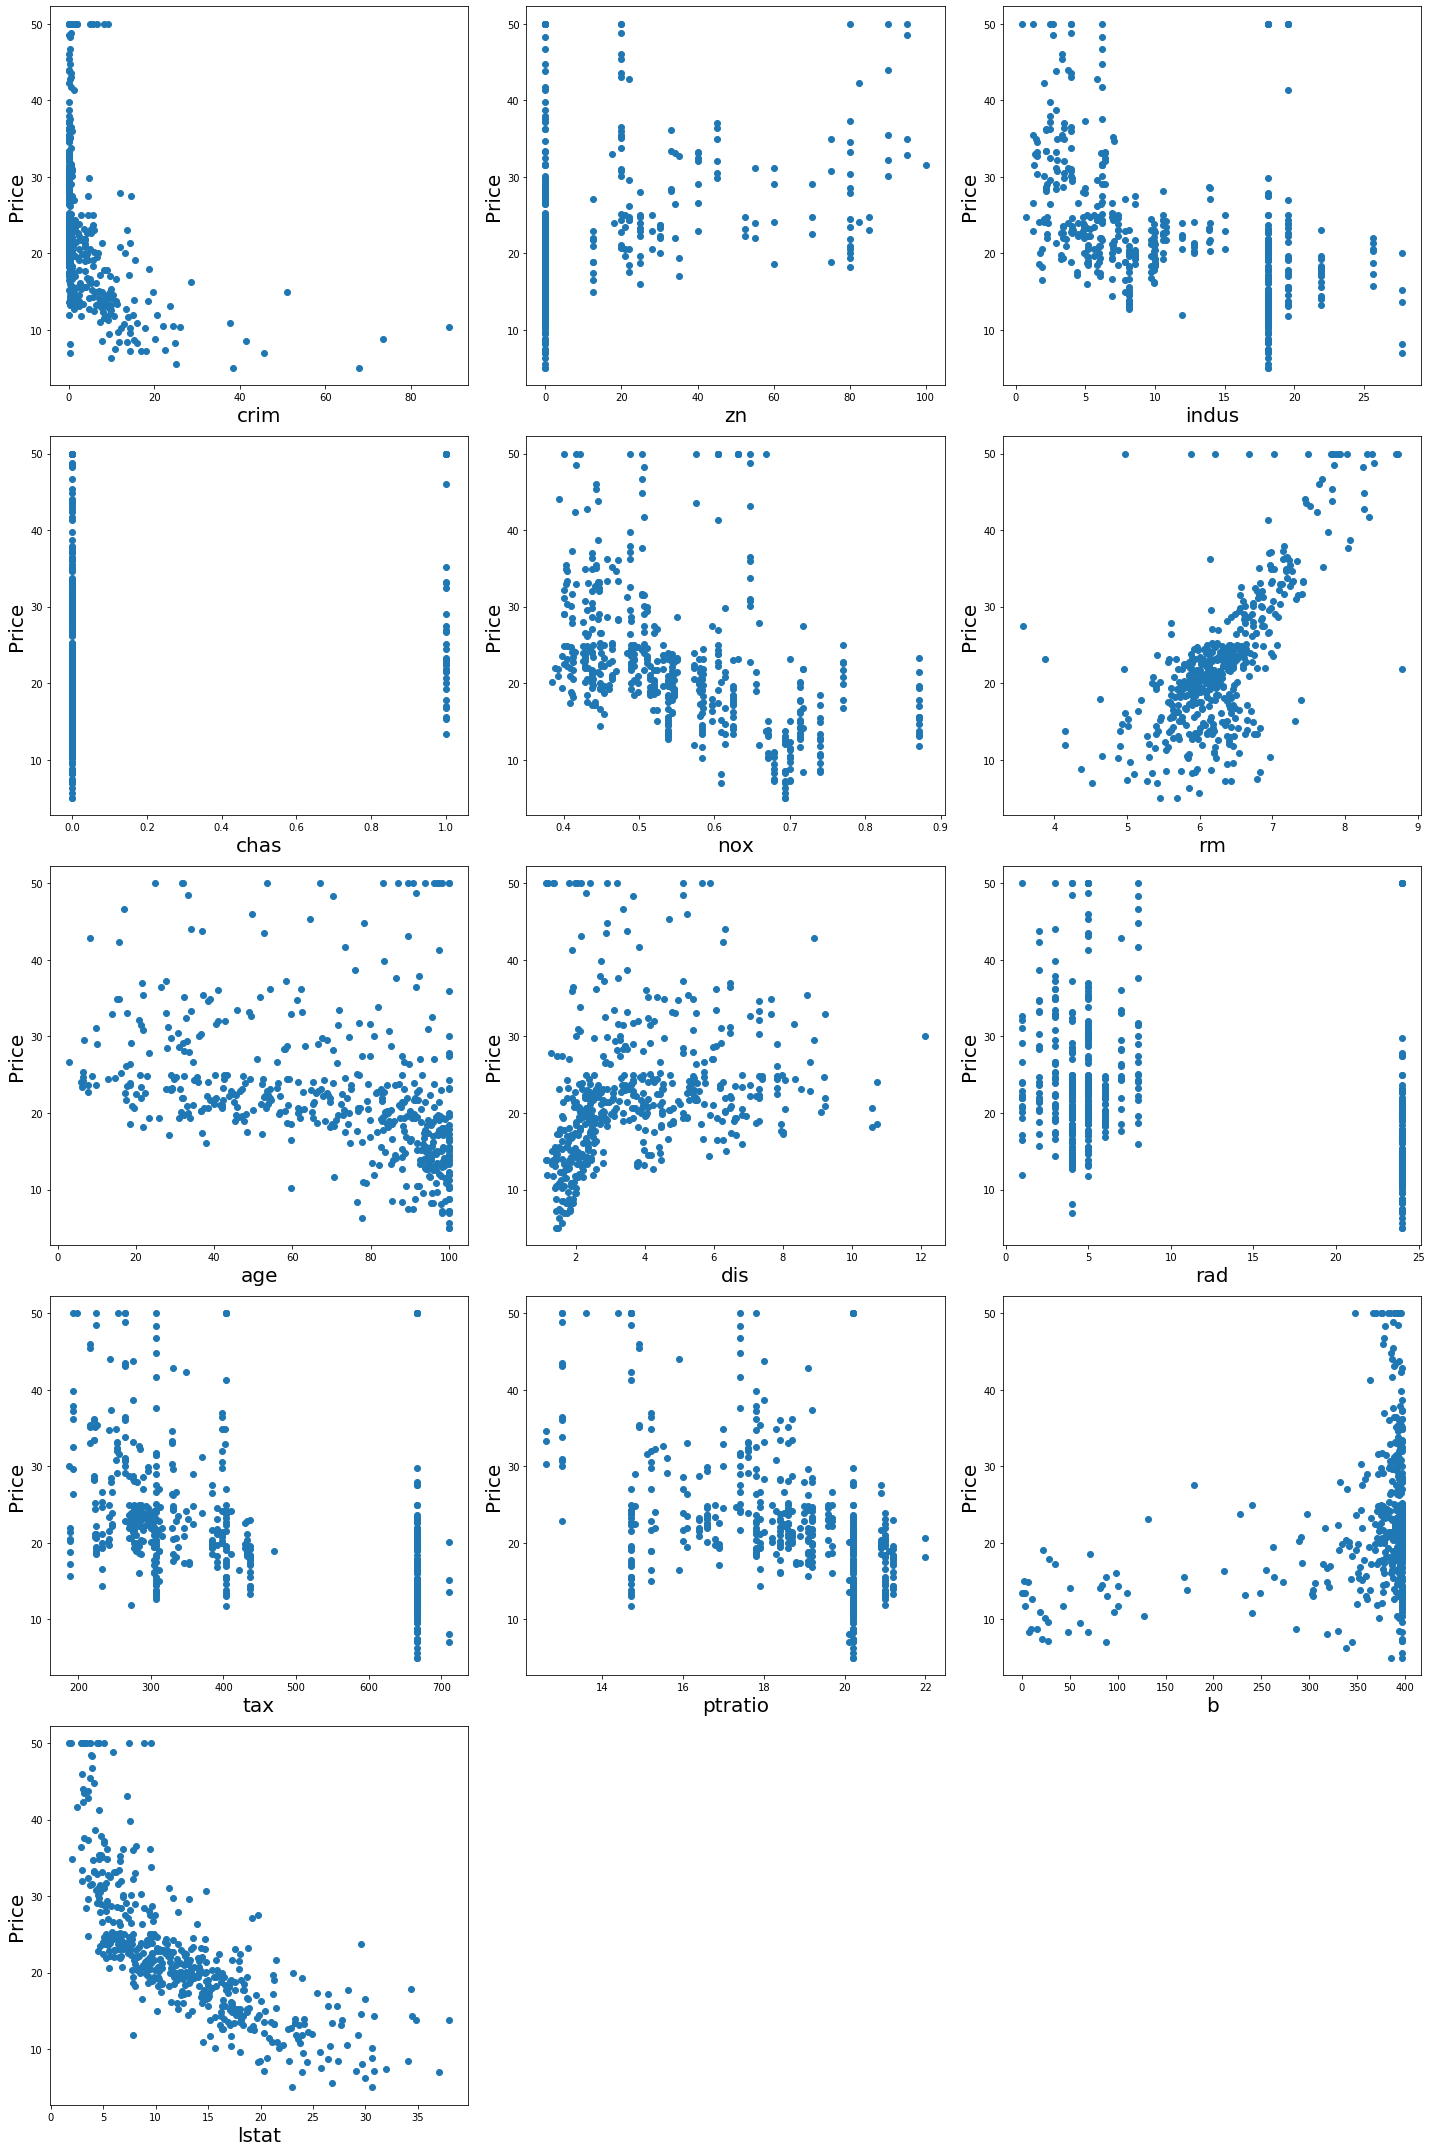

In [78]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [113]:
# correlation between each features with the target variable
price_correlation={}
for i in df.columns:
    if i!='price':
        corr_value=df['price'].corr(df[i]) 
        price_correlation[i]=corr_value
        print("Correlation value between price and {} is {}".format(i,corr_value))
print("MAX correlated features are:", max(price_correlation, key=price_correlation.get),',',min(price_correlation, key=price_correlation.get))

Correlation value between price and crim is -0.3883046085868113
Correlation value between price and zn is 0.3604453424505433
Correlation value between price and indus is -0.48372516002837285
Correlation value between price and chas is 0.17526017719029818
Correlation value between price and nox is -0.42732077237328236
Correlation value between price and rm is 0.6953599470715389
Correlation value between price and age is -0.376954565004596
Correlation value between price and dis is 0.24992873408590388
Correlation value between price and rad is -0.38162623063977746
Correlation value between price and tax is -0.4685359335677669
Correlation value between price and ptratio is -0.5077866855375615
Correlation value between price and b is 0.33346081965706637
Correlation value between price and lstat is -0.7376627261740147
MAX correlated features are: rm , lstat


To fit a linear regression model, we select those features which have a high correlation with our target variable price. By looking at the correlation matrix we can see that RM has a strong positive correlation with price (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).


In [114]:
y = df['price']
X =df.drop(columns = ['price'])

In [115]:
X 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [116]:
X.drop('tax',axis=1,inplace=True) # vif below.

In [117]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -1.45900038,
        0.44105193, -1.0755623 ])

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [28]:
vif['Result'] = vif['VIF'].apply(lambda x: 'Non Collinear' if x <= 5 else 'Collinear')
vif

,VIF,Features,Result
0,1.792192,crim,Non Collinear
1,2.298758,zn,Non Collinear
2,3.991596,indus,Non Collinear
3,1.073995,chas,Non Collinear
4,4.393720,nox,Non Collinear
5,1.933744,rm,Non Collinear
6,3.100826,age,Non Collinear
7,3.955945,dis,Non Collinear
8,7.484496,rad,Collinear
9,9.008554,tax,Collinear


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity.

droping tax beacuse it is highly correlated with rad

In [60]:
#X.drop('tax',axis=1,inplace=True)
#X #already dropped above

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=255)


In [143]:
Y_train

469    20.1
235    24.0
481    23.7
454    14.9
90     22.6
       ... 
486    19.1
121    20.3
223    30.1
169    22.3
307    28.2
Name: price, Length: 404, dtype: float64

In [144]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train,Y_train)

LinearRegression()

In [145]:
regression.score(X_train,Y_train)

0.7110782664598558

In [146]:
regression.score(X_test,Y_test)

0.8035578456479593

In [147]:
regression.predict(X_test)

array([34.3510989 , 21.88627513, 19.01922584, 25.53859802, 15.38373747,
       11.45781711,  8.42717059, 23.87950192, 35.10121359, 25.08221849,
       31.11748667, 28.58671226, 32.24144925, 20.21429746, 29.8251748 ,
       17.80476607, 14.72018719, 20.46163029, 36.24594575, 22.98452379,
       22.63832289, 28.98615086, 19.32986303, 18.62039915, 13.37592469,
       31.77045385, 32.95399048, 22.99869525,  8.65674508, 14.47854716,
       37.41419933, 40.00261196, 22.24961875, 21.79565957, 18.19035591,
       23.2690826 , 25.13572243, 26.71535589, 26.13175285, 30.01927037,
       17.39589375, 11.41484563, 13.42738514, 17.46813752, 18.39705515,
       11.37953478, 25.13950174, 14.27835936, 13.73247177, 24.86783566,
       39.7437448 , 31.12357772, 26.13776002, 36.64595864, 40.3916106 ,
       20.82052002, 19.99867692, 25.62311892, 24.00384565, 33.00513482,
       37.60736209, 13.24718637, 15.63302008, 20.88129905, 17.5713993 ,
       21.57329717,  4.68275895, 34.43785761, 14.504408  , 24.10

In [148]:
X_scaled[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -1.45900038,
        0.44105193, -1.0755623 ])

In [149]:
regression.predict(scaler.transform([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98]]))

array([30.85613993])

In [150]:
# model evaluation for training set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_train_predict = regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regression.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.829872167728124
R2 score is 0.7110782664598558


The model performance for testing set
--------------------------------------
RMSE is 4.390293760953762
R2 score is 0.8035578456479593


In [151]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model import LassoCV,Lasso
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [152]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0008633501957025307

In [153]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.0008633501957025307)

In [154]:
lasso_reg.score(X_test, Y_test)

0.8035968433185736

In [155]:
lasso_reg.predict(scaler.transform([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98]]))

array([30.85530494])

In [156]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
from sklearn.linear_model import RidgeCV,Ridge
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([5.81021632, 9.32918433, 6.76389479, 1.50678542, 2.83303777,
       0.4491026 , 2.75978136, 1.08762559, 0.84200348, 3.23577486,
       9.17228168, 5.40779638, 1.80862705, 4.59344422, 1.83994641,
       4.87348991, 0.70299263, 6.29542659, 3.69898892, 8.76258131,
       7.36856807, 2.06150651, 1.30725982, 1.98480489, 1.91710446,
       4.91863021, 5.53247514, 0.94581029, 5.4078895 , 9.86000855,
       3.99207365, 5.76802639, 8.71677296, 3.45443362, 0.85557263,
       8.87847719, 8.74552498, 8.61608195, 8.75694659, 9.07666748,
       0.5695802 , 2.07357943, 3.03215422, 5.14752839, 2.93636041,
       7.49234092, 5.70244451, 5.06228067, 8.51211858, 2.72814368]),
        cv=10, normalize=True)

In [157]:
ridgecv.alpha_

0.4491026041877

In [158]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.4491026041877)

In [159]:
ridge_model.score(X_test, Y_test)

0.8035980008332423

In [160]:
ridge_model.predict(scaler.transform([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98]]))

array([30.85106433])